In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [176]:
class logisticRegression:

    def __init__(self):
        self.__theta=[0]  #intiailize theta,x,y,cost to zero
        self.__x=[0]      
        self.__y=[0]
        self.__j=[]
        self.__m=1
        self.__n=1
    def sigmoid(self,z):
        '''Returns sigmoid or logistic function output
        input z
        h(q)=1/(1+exp(-z))
        '''
        h=1/(1+np.exp(-z))
        return h
    def featureNormalize(self,x):
         #future normalization
        mu=x.values.mean(axis=0)
        sigma=x.values.std(axis=0)
        X=(x-mu)/sigma
        return [X,mu,sigma]
    
    def gradientDescent(self,learningRate,m):
        #find z
        z=self.__x.dot(self.__theta.transpose())
        print(z)
        #determine the hypothesis vector
        h=self.sigmoid(z)
        #simultaneously update the value of theta
        self.__theta-=((h-self.__y).transpose().dot(self.__x))*learningRate/m
        
    def costFunction(self,m):
        #find z
        z=self.__x.dot(self.__theta.transpose())
        #find h(x)
        h=self.sigmoid(z)
        #find the cost
        j=(np.sum(-np.log(h[self.__y[:]==1]))+np.sum(-np.log(1-h[self.__y[:]==0])))/m
        #add the cost to the cost vector
        self.__j.append(j)
        
    
        
    def fit(self,x,y,iteration,learningRate):
        #find m or number of total observations
        m=y.size
        #find number of features
        n=x.values[0].size
        #initialize theta to zero vector, from qo to qn
        self.__theta=np.random.uniform(0,100,(1,n+1))
        #add x0=1 to feature matrice  for convinience
        X=x.values
        self.__x=np.hstack((np.ones((m,1)),X.reshape((m,n))))
        self.__y=y.values.reshape((m,1))
        self.costFunction(m)
        for i in range(iteration):
            #call gradient descent 
            self.gradientDescent(learningRate,m)
            #add cost of each iteration to cost vector
            self.costFunction(m)
           
    def predict(self,x):
        #predict the value of y or target vector
        m=x.shape[0]
        n=x.values[0].size
        x=np.hstack((np.ones((m,1)),x.values.reshape((m,n))))
        z=x.dot(self.__theta.transpose())
        h=self.sigmoid(z)
        h.reshape((m),inplace=True)
        for i in range(h.size):
            if h[i]>=0.5:
                h[i]=1
            else:
                h[1]=0
                
        return h
    def coefficient(self):
        return self.__theta
    
    def cost(self):
        return self.__j

In [13]:
data=pd.read_csv('ex2data1.txt',names=['exam1_score','exam2_score','admission'])

In [14]:
data.head()

,exam1_score,exam2_score,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [20]:
mapper={0:'Admitted',1:'Not admitted'}
data['status']=data['admission'].map(mapper)

In [21]:
data.head()

,exam1_score,exam2_score,admission,status
0,34.623660,78.024693,0,Admitted
1,30.286711,43.894998,0,Admitted
2,35.847409,72.902198,0,Admitted
3,60.182599,86.308552,1,Not admitted
4,79.032736,75.344376,1,Not admitted


In [36]:
import cufflinks as cf
cf.set_config_file(sharing='public',theme='ggplot',offline=True)
import plotly.express as px

<AxesSubplot:xlabel='exam1_score', ylabel='exam2_score'>

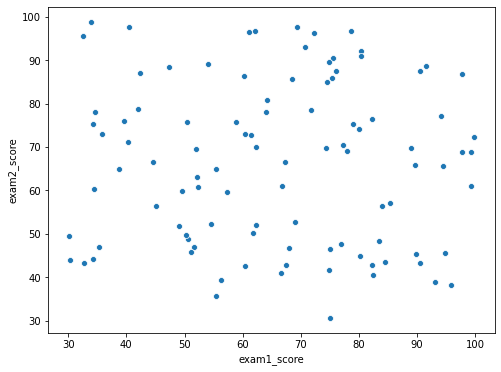

In [35]:
fig=plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='exam1_score',y='exam2_score')

In [43]:
px.scatter(data_frame=data,x='exam1_score',y='exam2_score',color='status',symbol='status')

In [172]:
x=data[['exam1_score','exam2_score']]
y=data['admission']

In [177]:
lm=logisticRegression()

In [197]:
x,mu,sigma=lm.featureNormalize(x)
lm.fit(x,y,100,1)

C:\Users\Ermi\anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning:

divide by zero encountered in log



[[  -2.17747353]
 [-150.66786303]
 [ -15.7808095 ]
 [ 147.37606209]
 [ 193.44021268]
 [ -35.39927158]
 [ 190.04126691]
 [  66.56103364]
 [ 225.2829608 ]
 [  98.77485727]
 [ 131.74237108]
 [   6.50021676]
 [ 212.88654844]
 [ 232.83366401]
 [  13.10841984]
 [ 129.51013943]
 [  62.25401027]
 [  34.2450794 ]
 [ 220.81431273]
 [  79.45683098]
 [  17.13524365]
 [ 206.83311369]
 [ -38.2159473 ]
 [-131.30243987]
 [ 164.33238455]
 [  95.52262362]
 [  83.96964457]
 [ 121.18230467]
 [  19.3722408 ]
 [ -31.91592753]
 [ 102.12727522]
 [ 154.13499884]
 [  22.76403593]
 [  46.19557236]
 [  -1.97414684]
 [  -6.58974965]
 [  72.96385499]
 [ 145.56037687]
 [  46.73237299]
 [ -14.70069997]
 [ 144.37837637]
 [ -41.04661938]
 [ 228.04485241]
 [  78.24691488]
 [ -47.25099687]
 [  27.98043246]
 [ 166.53613809]
 [ 323.06453746]
 [ 195.48597538]
 [ 301.72136244]
 [ 193.22085638]
 [ 233.22065822]
 [ 126.55702361]
 [ -68.95759459]
 [ -35.79675417]
 [  -1.39997774]
 [ 255.26517125]
 [  54.45924746]
 [ 150.5142076

 [ 2.23206131e+02]]
[[-1.35420291e+01]
 [-1.73474761e+02]
 [-2.86898717e+01]
 [ 1.41048483e+02]
 [ 1.85303420e+02]
 [-5.28229264e+01]
 [ 1.87099967e+02]
 [ 4.87397364e+01]
 [ 2.20782799e+02]
 [ 8.08437773e+01]
 [ 1.13147730e+02]
 [-1.64828603e+01]
 [ 2.05419739e+02]
 [ 2.31044430e+02]
 [ 1.55388109e+00]
 [ 1.23547680e+02]
 [ 4.58852254e+01]
 [ 1.58114307e+01]
 [ 2.17594393e+02]
 [ 6.21463607e+01]
 [-2.59385992e+00]
 [ 1.96589584e+02]
 [-5.75507322e+01]
 [-1.53645617e+02]
 [ 1.54031741e+02]
 [ 8.40963605e+01]
 [ 6.60641508e+01]
 [ 1.02520512e+02]
 [ 1.53206275e+00]
 [-4.71121405e+01]
 [ 9.15419940e+01]
 [ 1.40667368e+02]
 [ 8.19186343e+00]
 [ 3.36576464e+01]
 [-1.50396242e+01]
 [-2.44599620e+01]
 [ 6.82781758e+01]
 [ 1.37853828e+02]
 [ 2.72779221e+01]
 [-2.70075358e+01]
 [ 1.30531538e+02]
 [-6.09349334e+01]
 [ 2.18166291e+02]
 [ 5.91823341e+01]
 [-6.75198237e+01]
 [ 1.07604021e+01]
 [ 1.56648817e+02]
 [ 3.20338692e+02]
 [ 1.92717066e+02]
 [ 2.99060089e+02]
 [ 1.84785979e+02]
 [ 2.223088

In [198]:
lm.cost()

[inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf

In [200]:
1/(1+math.exp(-262))

1.0